<a href="https://colab.research.google.com/github/seiji0906/machine/blob/main/0110_1623_suc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from numpy.core.fromnumeric import ravel


# import numpy as np
# import matplotlib.pyplot as plt
# import random

# from sklearn.model_selection import train_test_split
# from sklearn import svm
# from sklearn.metrics import accuracy_score

#　数値　定義

# burn_in = 500
# interval = 100

# batch_size = 512
# epochs = 10

In [ ]:
import numpy as np
import cv2
import glob as glob
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

path = '/content/drive/MyDrive/Colab Notebooks'

# まずは、データの確認


folder = ['常磁性', '強磁性']

X_image = []
Y_label = []

for label,class_name in enumerate(folder):
  files = glob.glob(path + "/" +  class_name + "/*.jpg")
  for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,dsize=(180,180))
    X_image.append(img)
    Y_label.append(label)


# sizeを180 180にして、X_imageに格納し、train_test_splitでラベルとともに分けられるかどうかを確認

#精度を上げるために正規化
X_image = np.array(X_image)
X_image = X_image.astype('float32')
X_image /= 255.0

# ここはモデルのrescalingでやってくれるはず

Y_label = np.array(Y_label)
Y_label = np_utils.to_categorical(Y_label, len(folder))
Y_label[:5]

# print(X_image)
# print(Y_label)

#学習データとテストデータに分ける(テストデータ2割、学習データ8割)
X_train,X_test,Y_train,Y_test = train_test_split(X_image,Y_label,test_size=0.2)
#学習データ(8割)
print(X_train)
# #テストデータ(2割)
print(X_test)
# #学習データ(8割)
print(Y_train)
# #テストデータ(2割)
print(Y_test)


In [22]:
from tensorflow.python import metrics
from warnings import filters
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 1))
#モノクロなら1、カラーなら3

x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(2, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 180, 180, 1)]     0         
                                                                 
 rescaling_9 (Rescaling)     (None, 180, 180, 1)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 178, 178, 32)      320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

In [ ]:
# # 学習

# from keras.applications.vgg16 import VGG16
# from keras.models import Sequential
# from keras.models import model_from_json
# from keras.models import Model
# from keras.layers import Input, Activation, Dense, Flatten, Dropout
# from tensorflow.keras.optimizers import Adam

# #vgg16
# input_tensor = Input(shape=(224,224,3))
# #最後の1000の層を省く
# base_model = VGG16(weights='imagenet', input_tensor=input_tensor,include_top=False)


# #後付けで入れたい層の作成
# top_model = Sequential()
# top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
# top_model.add(Dense(len(folder), activation='softmax'))


# #結合
# model = Model(inputs=base_model.input, outputs=top_model(base_model.output))


# #学習させない層
# for layer in model.layers[:15]:
#   layer.trainable = False

# print('# layers=', len(model.layers))

# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# model.summary()

In [23]:
# 学習データで学習
model.fit(X_train, Y_train, epochs=10, batch_size=16)

#テストデータで精度確認
score = model.evaluate(X_test, Y_test, batch_size=16)

print(score)

Epoch 1/10
50/50 [==============================] - 59s 1s/step - loss: 0.7100 - accuracy: 0.5412
Epoch 2/10
50/50 [==============================] - 53s 1s/step - loss: 0.6807 - accuracy: 0.5813
Epoch 3/10
50/50 [==============================] - 53s 1s/step - loss: 0.5734 - accuracy: 0.6975
Epoch 4/10
50/50 [==============================] - 53s 1s/step - loss: 0.2305 - accuracy: 0.9362
Epoch 5/10
50/50 [==============================] - 53s 1s/step - loss: 0.2850 - accuracy: 0.9375
Epoch 6/10
50/50 [==============================] - 53s 1s/step - loss: 0.0681 - accuracy: 0.9825
Epoch 7/10
50/50 [==============================] - 57s 1s/step - loss: 0.3035 - accuracy: 0.8750
Epoch 8/10
50/50 [==============================] - 53s 1s/step - loss: 0.2579 - accuracy: 0.9425
Epoch 9/10
50/50 [==============================] - 53s 1s/step - loss: 0.0396 - accuracy: 0.9837
Epoch 10/10
13/13 [==============================] - 4s 277ms/step - loss: 0.0020 - accuracy: 1.0000
[0.00197630422189

In [24]:
path = '/content/drive/MyDrive/Colab Notebooks'


folder = ['相転移']

X_image = []
# Y_label = []

for label,class_name in enumerate(folder):
  files = glob.glob(path + "/" +  class_name + "/*.jpg")
  for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,dsize=(180,180))
    X_image.append(img)
    # Y_label.append(label)

#精度を上げるために正規化
X_image = np.array(X_image)
X_image = X_image.astype('float32')
X_image /= 255.0

# Y_label = np.array(Y_label)
# Y_label = np_utils.to_categorical(Y_label, len(folder))
# Y_label[:5]

# #学習データとテストデータに分ける(テストデータ2割、学習データ8割)
# X_train,X_test,Y_train,Y_test = train_test_split(X_image,Y_label,test_size=0.2)
# #学習データ(8割)
# print(X_train.shape)
# #テストデータ(2割)
# print(X_test.shape)
# #学習データ(8割)
# print(Y_train.shape)
# #テストデータ(2割)
# print(Y_test.shape)
print(len(X_image))

50


In [25]:
history = model.predict(X_image)

2/2 [==============================] - 1s 340ms/step


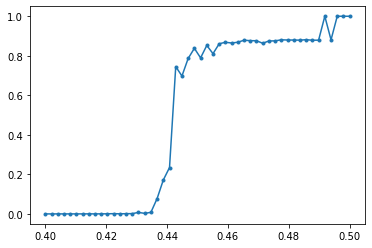

In [28]:
import matplotlib.pyplot as plt


# print(history)
# plt.plot(history)

# print(history)

predict = []

for i in range(len(history)):
  predict.append(history[i][1])

betas=np.linspace(0.4, 0.5, 50).tolist()


fig, ax = plt.subplots()
ax.errorbar(betas, predict, capsize=4, marker='.')
plt.show()